# Machine Learning - Exercise 1
# Classification Evaluation

This exercise illustrates examples of evaluation of solutions of classification problems.

##Import 

Import libraries that contains the implementations of the functions used in the rest of the program.



In [ ]:
import random
import numpy as np
import sklearn.metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("Libraries imported.")

Libraries imported.


## Load data

Load training data.

Choose one of the datasets described in the next subsections.

More details on these datasets are available in https://scikit-learn.org/stable/datasets/index.html


### IRIS dataset

In [ ]:
DB = datasets.load_iris()
dataset_name = "Iris"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

### Wine dataset

In [ ]:
DB = datasets.load_wine()
dataset_name = "Wines"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

###Digits dataset

In [ ]:
DB = datasets.load_digits()
dataset_name = "Digits"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

###Unbalanced Digits dataset

Adapted from the Digits dataset with digit 0 mapped to class '0' and all other digits mapped to class '1'

In [ ]:
# Binary Digits unbalanced
DB = datasets.load_digits()
dataset_name = "Digits_01_unbalanced"
class_names = np.array(["0","1"])
X_all = DB.data
y_all = DB.target
cont = 0
for i in range(0,len(y_all)):
  if y_all[i] != 0:
    y_all[i] = 1
    cont += 1
print("Percentage of non-zero digits: %f" %(cont/len(y_all)))

Percentage of non-zero digits: 0.900946


###Summary of the dataset

Print some information about the dataset.

Data structures

    Input X: array ( n x m )
    Output Y: array ( n x 1 )

In [ ]:
print("Dataset: %s" %(dataset_name))
print("Input shape: %s" %str(X_all.shape))
print("Output shape: %s" %str(y_all.shape))
print("Number of attributes/features: %d" %(X_all.shape[1]))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(X_all.shape[0]))

Dataset: Digits
Input shape: (1797, 64)
Output shape: (1797,)
Number of attributes/features: 64
Number of classes: 10 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of samples: 1797


### Show an example

Display a random sample.

In [ ]:
id = random.randrange(0,X_all.shape[0])

print("x%d = %r" %(id,X_all[id]))
print("y%d = %r ['%s']" %(id,y_all[id],class_names[y_all[id]]))

x1321 = array([ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,
        0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       12., 15., 11.,  5.,  0.,  0.,  0.,  0., 14., 15., 12., 15., 11.,
        0.,  0.,  0., 12., 13.,  0.,  0., 16.,  5.,  0.,  0.,  6., 15.,
        4., 11., 16.,  4.,  0.,  0.,  0., 13., 16., 14.,  9.,  0.])
y1321 = 6 ['6']


##Split data

Split the data set in training set `X_train`, `y_train` and test set `X_test`, `y_test`, using `test_size` to denote percentage of samples in the test set.

Note:
`random_state` parameter is used as random seed. Change this value to generate a different split.

IMPORTANT: solution will depend on this data split.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.30, 
                                                    random_state=117)

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

print('First training sample')
id = 0
print("    x_train_%d = %r" %(id,X_train[id]))
print("    y_train_%d = %r ['%s']" %(id,y_train[id],class_names[y_train[id]]))

print('First test sample')
id = 0
print("    x_test_%d = %r" %(id,X_test[id]))
print("    y_test_%d = %r ['%s']" %(id,y_test[id],class_names[y_test[id]]))


Size of training set: 1257
Size of test set: 540
First training sample
    x_train_0 = array([ 0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
       15.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,
        7., 16., 16., 15.,  0.,  0.,  0.,  3., 15.,  7., 15., 10.,  0.,
        0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.])
    y_train_0 = 1 ['1']
First test sample
    x_test_0 = array([ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
        0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        8., 13.,  8.,  2.,  0.,  0.,  0.,  0., 13., 16., 13., 14.,  4.,
        0.,  0.,  0., 11.,  8.,  2.,  3., 13.,  0.,  0.,  0.,  7., 11.,
        5., 12., 11.,  0.,  0.,  0.,  1., 11., 12.,  4.,  0.,  0.])
    y_test_0 = 6 ['6']


##Create a Model 

Define the model that will be used for learning.

Create an instance of a class implementing a classification method.



**Decision Trees**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
model = tree.DecisionTreeClassifier()

**Support Vector Machines**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svm%20svc#sklearn.svm.SVC

In [ ]:
model = svm.SVC(kernel='linear', C=1)


Probabilistic generative model 

**Gaussian Naive Bayes**

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB


In [ ]:
model = GaussianNB()


Probabilistic discriminative model

**Logistic regression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression


In [ ]:
model = LogisticRegression()

**(HOMEWORK)**
**Different classification models to evaluate Digits dataset**

In [ ]:
modelDecision = tree.DecisionTreeClassifier()
modelSVC = svm.SVC(kernel='linear', C=1)
modelGaussian = GaussianNB()
modelLogistic = LogisticRegression()


## Fit the model

Finding a solution for this model given the data set.
The solution is stored in the model object.


In [ ]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**HOMEWORK - Fit all models**

In [ ]:
modelDecision.fit(X_train, y_train)
modelSVC.fit(X_train, y_train)
modelGaussian.fit(X_train, y_train)
modelLogistic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Predict on test set

Use test set for prediction.

In [ ]:
y_pred = model.predict(X_test)

Use this statement to generate a prediction vector of all values '1' useful to test performance with the Unblanced Digits dataset.



In [ ]:
# Result of model that predicts only 1 (for unblanced digits)
y_pred = np.ones(len(X_test))

**HOMEWORK - predict on test set**

In [ ]:
y_predDecision = modelDecision.predict(X_test)
y_predSVC = modelSVC.predict(X_test)
y_predGaussian = modelGaussian.predict(X_test)
y_predLogistic = modelLogistic.predict(X_test)

##Evaluate the Model

Evaluation of a specific solution on the test set, comparing predicted values `y_pred` with test values `y_test`.

### Accuracy

In [ ]:
acc = model.score(X_test, y_test)    
print("Accuracy %.3f" %acc)

Accuracy 0.963


**HOMEWORK - accuracy for all models**

In [ ]:
accDecision = modelDecision.score(X_test, y_test)  
accSVC = modelSVC.score(X_test, y_test)  
accGaussian = modelGaussian.score(X_test, y_test)  
accLogistic = modelLogistic.score(X_test, y_test)

print("Accuracy Decision %.3f" %accDecision) 
print("Accuracy SVC %.3f" %accSVC) 
print("Accuracy Gaussian %.3f" %accGaussian) 
print("Accuracy Logistic %.3f" %accLogistic) 

Accuracy Decision 0.848
Accuracy SVC 0.978
Accuracy Gaussian 0.804
Accuracy Logistic 0.950


###Precision & Recall

Classification report contains more accurate performance information.

In [ ]:
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))


              precision    recall  f1-score   support

     class_0      1.000     0.889     0.941        18
     class_1      0.913     1.000     0.955        21
     class_2      1.000     1.000     1.000        15

    accuracy                          0.963        54
   macro avg      0.971     0.963     0.965        54
weighted avg      0.966     0.963     0.963        54



**HOMEWORK - precision recall** 


In [ ]:
print('PRECISION RECALL Decision')
print(classification_report(y_test, y_predDecision, labels=None, target_names=class_names, digits=3))

print('PRECISION RECALL SVC')
print(classification_report(y_test, y_predSVC, labels=None, target_names=class_names, digits=3))

print('PRECISION RECALL Gaussian')
print(classification_report(y_test, y_predGaussian, labels=None, target_names=class_names, digits=3))

print('PRECISION RECALL Logistic')
print(classification_report(y_test, y_predLogistic, labels=None, target_names=class_names, digits=3))

PRECISION RECALL Decision
              precision    recall  f1-score   support

           0      0.954     0.969     0.961        64
           1      0.750     0.840     0.792        50
           2      0.811     0.796     0.804        54
           3      0.750     0.818     0.783        55
           4      0.900     0.766     0.828        47
           5      0.961     0.845     0.899        58
           6      0.927     0.879     0.903        58
           7      0.945     0.929     0.937        56
           8      0.725     0.822     0.771        45
           9      0.759     0.774     0.766        53

    accuracy                          0.848       540
   macro avg      0.848     0.844     0.844       540
weighted avg      0.854     0.848     0.850       540

PRECISION RECALL SVC
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        64
           1      0.942     0.980     0.961        50
           2      1.000     1.0

### Confusion Matrix

Shows the results in a graphical form.

cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

[[16  2  0]
 [ 0 21  0]
 [ 0  0 15]]


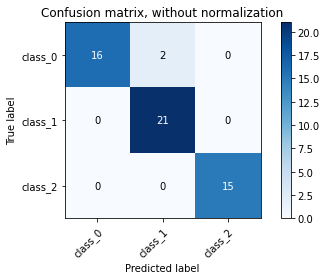

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

## Evaluate a specific instance of a method

Evaluation of a specific method with instantiated hyper-parameters
through Cross Validation



In [ ]:
#K-Fold Cross Validation 
cv = ShuffleSplit(n_splits=5, test_size=0.333, random_state=15)
scores = cross_val_score(model, X_all, y_all, cv=cv)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.98333333 0.95       0.93333333 0.98333333 0.98333333]
Accuracy: 0.967 (+/- 0.04)


## Prediction of a new sample

In [ ]:
if dataset_name == "Iris":
  xnew = np.array([8.5, 2.6, 9.2, 0.3])
elif dataset_name == "Wines":
  xnew = np.array([12, 2.5, 2.6, 15, 186, 1.5, 9.1,
                   0.44, 2.2, 5.6, 2.9, 3.7, 380])
elif dataset_name == "Digits" or dataset_name == "Digits_01_unbalanced":
   xnew = np.array([  
        0,  0,  8, 13, 18, 13, 11,  1,  0, 10,  9,  4,  6,
       16,  3,  0,  0,  0,  0, 10,  1, 13,  0,  0,  0,  0,
        0,  7, 14,  2,  0,  0,  0,  0,  0,  7, 13,  1,  0,
        0,  0,  0,  0,  0,  8, 13,  1,  0,  0,  0,  0,  0,
       13,  6,  7,  1,  0,  0, 14, 12, 13,  1,  0,  0])
 
xnew = xnew.reshape(1,-1)
 
print("x_new = %r" %(xnew))
ynew = model.predict(xnew)
print("y_pred = %d %s" %(ynew,class_names[ynew]))

# only for probabilistic models
try:
  mconf = np.max(model.predict_proba(xnew))
  print("Confidence: %.2f" %(mconf))
except:
  pass  

x_new = array([[ 12.  ,   2.5 ,   2.6 ,  15.  , 186.  ,   1.5 ,   9.1 ,   0.44,
          2.2 ,   5.6 ,   2.9 ,   3.7 , 380.  ]])
y_pred = 1 ['class_1']
Confidence: 1.00


##Common Mistake

Evaluate solution on data used for training!!!


In [ ]:
model.score(X_all,y_all)

0.9831460674157303

## Home Exercises

**Question 1**

Design an evaluation procedure to assess and compare the different performance of the classifcation models seen above on the Digits dataset

**Question 2** 

Consider the Unbalanced Digits dataset and compare one of the above classification method with the classifier that always returns the most common label in the dataset. Which performance metrics are significant in this comparison?


  
